<a href="https://colab.research.google.com/github/tunnu-sahni/ML_Projects/blob/main/logistic_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df['species']!='setosa'

,species
0,False
1,False
2,False
3,False
4,False
...,...
145,True
146,True
147,True
148,True


In [ ]:
df['species']=='setosa'

,species
0,True
1,True
2,True
3,True
4,True
...,...
145,False
146,False
147,False
148,False


In [ ]:
df[df['species']!='setosa']

NameError: name 'df' is not defined

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN


In [ ]:
import pandas as pd

# Re-load df and map species, as these definitions might be lost or unexecuted
df = pd.read_csv('/content/iris.csv')
df['species'] = df['species'].map({'versicolor':0,'virginica':1})

# Prepare the dataset for binary classification (versicolor vs virginica)
# Filter out 'setosa' instances, as they result in NaN after your previous mapping
df_filtered = df[df['species'].notna()]

# Split dataset into independent and dependent feature
x = df_filtered.iloc[:, :-1]  # Features
y = df_filtered.iloc[:, -1]   # Target (species column, now containing only 0s and 1s)
x

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,species
50,0.0
51,0.0
52,0.0
53,0.0
54,0.0
...,...
145,1.0
146,1.0
147,1.0
148,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.base import ClassifierMixin
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elastic'],'C':[1,2,3,4,5,6,7,10,20,50],'max_iter':[100,200,300]}


In [ ]:
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression()
classifier_regressor=classifier_regressor = GridSearchCV(Classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [ ]:
classifier_regressor.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 10, 20, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elastic']},
             scoring='accuracy')

In [ ]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
print(classifier_regressor.best_score_)

0.9733333333333334


In [ ]:
##prediction
y_pred=classifier_regressor.predict(X_test)

In [ ]:
##accuracy score
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.92


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



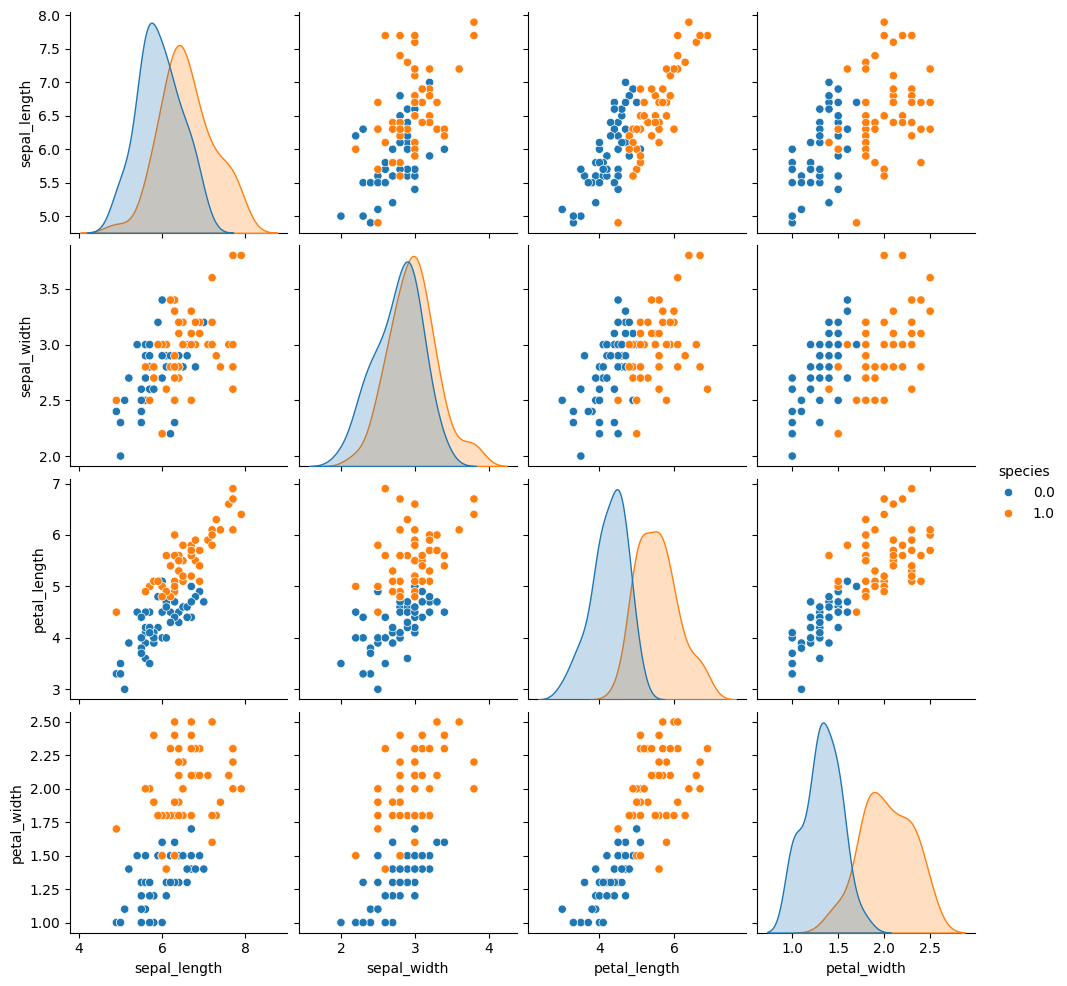

In [ ]:
##EDA
sns.pairplot(df,hue='species')

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.494305
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.308080
petal_length,0.871754,-0.420516,1.000000,0.962757,0.786424
petal_width,0.817954,-0.356544,0.962757,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000
